#Финальный проект обучения курса CV-инженер. Часть 3.

##Задача 4. Подготовка модели к использованию в продакшене

Итак, в предыдущих ноутбуках был создан класс модели для оценки схожести поз на видео.

Сейчас создадим модулль и проверим его работу.

Из необходимх библиотек, непосредственно для работы модуля необходимо загрузить только его самого. Но для работы также необходимо присутствие модуля pose_detection_utils.

Модули numpy и matplotlib необходимы для визуаллизации результатов сравнения в ноутбуке

In [ ]:
import pose_video_similarity_utils
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Загрузим видео в модели.

В качестве образца работы, было выбрано видео с онлайн урока карате.

In [ ]:
reference_video = "/content/karate_reference.mp4"
compare_video = "/content/karate_to_compare.mp4"

In [ ]:
reference_model = pose_video_similarity_utils.pose_video_model(reference_video, 500, keypoint_threshold=2)

Reading frames...


0it [00:00, ?it/s]

Restoring keypoints...


  0%|          | 0/361 [00:00<?, ?it/s]

Processing keypoints...


  0%|          | 0/362 [00:00<?, ?it/s]

In [10]:
compare_model = pose_video_similarity_utils.pose_video_model(compare_video, 0, 10000, keypoint_threshold=2)

Reading frames...


0it [00:00, ?it/s]

Restoring keypoints...


  0%|          | 0/300 [00:00<?, ?it/s]

Processing keypoints...


  0%|          | 0/301 [00:00<?, ?it/s]

Проведем сравнение моделью

In [11]:
output = compare_model.compare(reference_model)

  0%|          | 0/301 [00:00<?, ?it/s]

In [12]:
print(f"Mean general score: {np.mean(output['general_scores'])}")
print(f"Mean head score: {np.mean(output['head_scores'])}")
print(f"Mean body score: {np.mean(output['body_scores'])}")
print(f"Mean limb score: {np.mean(output['limbs_scores'])}")

Mean general score: 0.7784721851348877
Mean head score: 0.9532434940338135
Mean body score: 0.947882354259491
Mean limb score: 0.735449492931366


Как показала модель - повторить движения за тренером удалось не очень хорошо. Показатель косинусной близости всего 0.78

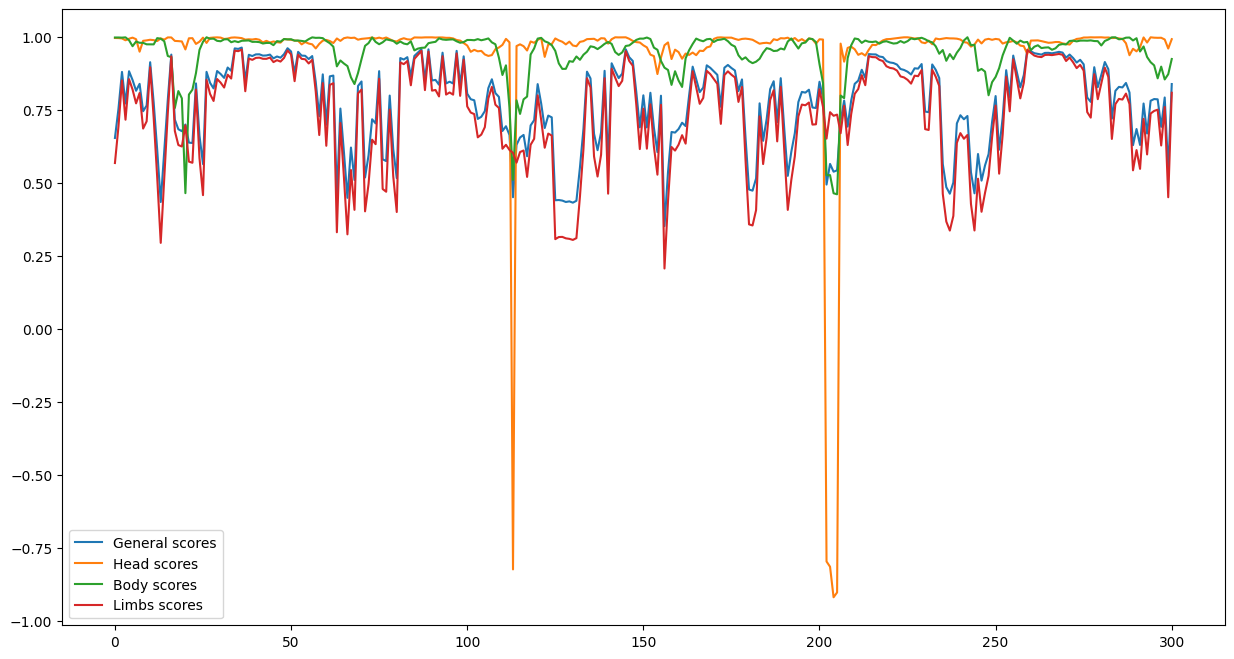

In [13]:
plt.figure(figsize = (15,8))
plt.plot(output['general_scores'], label = "General scores")
plt.plot(output['head_scores'], label = "Head scores")
plt.plot(output['body_scores'], label = "Body scores")
plt.plot(output['limbs_scores'], label = "Limbs scores")
plt.legend()
plt.show()

Но на графике видно, что есть моменты, когда получлаось неплохо)

In [14]:
compare_model.generate_comparing_video("compare_out.mp4", 800)

  0%|          | 0/301 [00:00<?, ?it/s]

In [15]:
pose_video_similarity_utils.show_video('compare_out.mp4', 1000)

Видео сгенерировалось как и ожидалосьЮ все параметры отображаются.

Модель готова!

#Заключение

Удалось реализовать все задачи и подготовить модель сравнения движений человека с референсным видео и отображение результатов на видео, для демонстрации тренирующемуся человеку того, какие именно части тела в какой момент времени он поставил не так как на референсном видео.

В качестве дальнейших улучшений, можно произвести оценку скорости движений и выровнять ее, а также автоматически определять момент начала движений на видео, для лучшей синхронизации оценки.